In [13]:
import pandas as pd
import numpy as np
import os
print(os.listdir('.'))

['.ipynb_checkpoints', '.~ProcessMedalTable.ipynb', 'data', 'Medals.csv', 'Predict1.ipynb', 'ProcessData.ipynb', 'ProcessMedalTable.ipynb', 'Untitled.ipynb']


In [14]:
file_medals = 'Medals.csv'
df_medals = pd.read_csv(
    file_medals,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
print(df_medals)

      Rank  NOC  Gold  Silver  Bronze  Total  Year
0        1  USA    11       7       2     20  1896
1        2  GRE    10      18      19     47  1896
2        3  GER     6       5       2     13  1896
3        4  FRA     5       4       2     11  1896
4        5  GBR     2       3       2      7  1896
...    ...  ...   ...     ...     ...    ...   ...
1424    84  PER     0       0       1      1  2024
1425    84  QAT     0       0       1      1  2024
1426    84  SGP     0       0       1      1  2024
1427    84  SVK     0       0       1      1  2024
1428    84  ZAM     0       0       1      1  2024

[1429 rows x 7 columns]


In [15]:
# 获取所有不同的国家代码 NOC, 和所有年份 year
countries = df_medals['NOC'].unique().tolist()
print(countries)
years = df_medals['Year'].unique().tolist()
print(years)

['USA', 'GRE', 'GER', 'FRA', 'GBR', 'HUN', 'AUT', 'AUS', 'DEN', 'SUI', 'BEL', 'ITA', 'CUB', 'CAN', 'ESP', 'LUX', 'NED', 'NOR', 'IND', 'BOH', 'SWE', 'ANZ', 'RUS', 'FIN', 'RSA', 'EST', 'BRA', 'JPN', 'TCH', 'NZL', 'YUG', 'ARG', 'URU', 'POL', 'HAI', 'POR', 'ROU', 'EGY', 'IRL', 'CHI', 'PHI', 'MEX', 'LAT', 'TUR', 'JAM', 'PER', 'SRI', 'TTO', 'KOR', 'PAN', 'IRI', 'PUR', 'URS', 'LBN', 'BUL', 'VEN', 'ISL', 'PAK', 'BAH', 'ETH', 'TPE', 'GHA', 'MAR', 'SGP', 'IRQ', 'TUN', 'KEN', 'NGR', 'GDR', 'FRG', 'MGL', 'UGA', 'CMR', 'PRK', 'COL', 'NIG', 'BER', 'THA', 'ZIM', 'TAN', 'GUY', 'CHN', 'CIV', 'SYR', 'ALG', 'DOM', 'ZAM', 'SUR', 'AHO', 'CRC', 'INA', 'ISV', 'SEN', 'DJI', 'EUN', 'LTU', 'NAM', 'CRO', 'ISR', 'SLO', 'MAS', 'QAT', 'UKR', 'CZE', 'KAZ', 'BLR', 'SVK', 'ARM', 'BDI', 'ECU', 'HKG', 'MDA', 'UZB', 'AZE', 'TGA', 'GEO', 'MOZ', 'KSA', 'VIE', 'BAR', 'KGZ', 'KUW', 'MKD', 'UAE', 'SCG', 'PAR', 'ERI', 'SRB', 'TJK', 'SAM', 'SUD', 'AFG', 'MRI', 'TOG', 'BRN', 'GRN', 'BOT', 'CYP', 'GAB', 'GUA', 'MNE', 'FIJ', 'JOR'

In [16]:
# 按国家从 DataFrame 中提取各个年份的奖牌数量
result = {}

for country in countries:
    # print(country)
    country_data = df_medals[df_medals['NOC'] == country]
    gold_list = []
    silver_list = []
    bronze_list = []
    total_list = []
    
    for year in years:
        # print(year)
        year_data = country_data[country_data['Year'] == year]
        
        gold = int(year_data['Gold']) if not year_data.empty else 0
        silver = int(year_data['Silver']) if not year_data.empty else 0
        bronze = int(year_data['Bronze']) if not year_data.empty else 0
        total = int(year_data['Total']) if not year_data.empty else 0
        gold_list.append(gold)
        silver_list.append(silver)
        bronze_list.append(bronze)
        total_list.append(total)
    
    result[country] = {
        'Gold': gold_list,
        'Silver': silver_list,
        'Bronze': bronze_list,
        'Total': total_list
    }

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52028\4116312352.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  gold = int(year_data['Gold']) if not year_data.empty else 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52028\4116312352.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  silver = int(year_data['Silver']) if not year_data.empty else 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52028\4116312352.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  bronze = int(year_data['Bronze']) if not year_data.empty else 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52028\4116312352.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [48]:
for country, data in result.items():
    print(f"Country: {country}")
    print("Gold: ", data['Gold'])
    print("Silver: ", data['Silver'])
    print("Bronze: ", data['Bronze'])
    print("Total: ", data['Total'])
    
    model = ARIMA(data['Gold'], order=(2,1,1)) #目前参数不一定最优，如何比较？
    model_fit = model.fit()
    forecast1 = model_fit.forecast(steps=1) #预测下一届
    model = ARIMA(data['Silver'], order=(2,1,1))
    model_fit = model.fit()
    forecast2 = model_fit.forecast(steps=1)
    model = ARIMA(data['Bronze'], order=(2,1,1))
    model_fit = model.fit()
    forecast3 = model_fit.forecast(steps=1)
    model = ARIMA(data['Total'], order=(2,1,1))
    model_fit = model.fit()
    forecast4 = model_fit.forecast(steps=1)
    print(f"Predicted Medals for next Olympics: {round(forecast1[0])}, {round(forecast2[0])}, {round(forecast3[0])}, {round(forecast4[0])}")

Country: USA
Gold:  [11, 19, 76, 23, 26, 41, 45, 22, 44, 24, 38, 40, 32, 34, 36, 45, 33, 34, 0, 83, 36, 37, 44, 37, 36, 36, 48, 46, 39, 40]
Silver:  [7, 14, 78, 12, 19, 27, 27, 18, 36, 21, 27, 19, 25, 21, 26, 28, 31, 35, 0, 61, 31, 34, 32, 24, 39, 39, 26, 37, 41, 44]
Bronze:  [2, 15, 77, 12, 19, 27, 27, 16, 30, 12, 19, 17, 17, 16, 28, 34, 30, 25, 0, 30, 27, 37, 25, 32, 26, 37, 30, 38, 33, 42]
Total:  [20, 48, 231, 47, 64, 95, 99, 56, 110, 57, 84, 76, 74, 71, 90, 107, 94, 94, 0, 174, 94, 108, 101, 93, 101, 112, 104, 121, 113, 126]


D:\Jupyter\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Medals for next Olympics: 40, 29, 32, 100
Country: GRE
Gold:  [10, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 4, 4, 6, 0, 0, 3, 2, 1]
Silver:  [18, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 4, 6, 6, 2, 0, 1, 1, 1]
Bronze:  [19, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 3, 4, 1, 2, 2, 1, 6]
Total:  [47, 0, 2, 4, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 2, 8, 13, 16, 3, 2, 6, 4, 8]
Predicted Medals for next Olympics: 1, 1, 2, 7
Country: GER
Gold:  [6, 4, 4, 3, 5, 0, 0, 10, 5, 38, 0, 0, 6, 12, 10, 0, 0, 0, 0, 0, 0, 33, 20, 13, 13, 16, 11, 17, 10, 12]
Silver:  [5, 3, 5, 5, 13, 0, 0, 7, 12, 31, 0, 7, 13, 19, 22, 0, 0, 0, 0, 0, 0, 21, 18, 17, 16, 11, 20, 10, 11, 13]
Bronze:  [2, 2, 6, 5, 7, 0, 0, 14, 7, 32, 0, 17, 7, 11, 18, 0, 0, 0, 0, 0, 0, 28, 27, 26, 20, 14, 13, 15, 16, 8]
Total:  [13, 9, 15, 13, 25, 0, 0, 31, 24, 101, 0, 24, 26, 42, 50, 0, 0, 0, 0, 0, 0, 82, 65, 56, 49, 41, 44, 42, 37, 33]


D:\Jupyter\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Predicted Medals for next Olympics: 10, 11, 11, 30
Country: FRA
Gold:  [5, 27, 0, 5, 7, 9, 13, 6, 11, 7, 10, 6, 4, 0, 1, 7, 2, 2, 6, 5, 6, 8, 15, 13, 11, 7, 11, 10, 10, 16]
Silver:  [4, 39, 1, 5, 4, 19, 15, 10, 5, 6, 6, 6, 4, 2, 8, 3, 4, 3, 5, 7, 4, 5, 7, 14, 9, 16, 11, 18, 12, 26]
Bronze:  [2, 37, 0, 9, 3, 13, 10, 5, 4, 6, 13, 6, 6, 3, 6, 5, 7, 4, 3, 16, 6, 16, 15, 11, 13, 20, 13, 14, 11, 22]
Total:  [11, 103, 1, 19, 14, 41, 38, 21, 20, 19, 29, 18, 14, 5, 15, 15, 13, 9, 14, 28, 16, 29, 37, 38, 33, 43, 35, 42, 33, 64]
Predicted Medals for next Olympics: 10, 13, 12, 35
Country: GBR
Gold:  [2, 15, 1, 56, 10, 14, 9, 3, 5, 4, 3, 1, 6, 2, 4, 5, 4, 3, 5, 5, 5, 5, 1, 11, 9, 19, 29, 27, 22, 14]
Silver:  [3, 7, 1, 51, 15, 15, 13, 10, 7, 7, 14, 2, 7, 6, 12, 5, 5, 5, 7, 11, 10, 3, 8, 10, 9, 13, 18, 23, 20, 22]
Bronze:  [2, 9, 0, 39, 16, 13, 12, 7, 5, 3, 6, 8, 11, 14, 2, 3, 9, 5, 9, 21, 9, 12, 6, 7, 12, 19, 18, 17, 22, 29]
Total:  [7, 31, 2, 146, 41, 42, 34, 20, 17, 14, 23, 11, 24, 22, 18, 13, 18,

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: NED
Gold:  [0, 0, 0, 0, 0, 4, 4, 6, 2, 6, 5, 0, 0, 0, 2, 3, 3, 0, 0, 5, 2, 2, 4, 12, 4, 7, 6, 8, 10, 15]
Silver:  [0, 2, 0, 0, 0, 2, 1, 9, 5, 4, 2, 5, 0, 1, 4, 3, 1, 2, 1, 2, 2, 6, 5, 9, 9, 5, 6, 7, 12, 7]
Bronze:  [0, 3, 0, 2, 3, 5, 5, 4, 1, 7, 9, 0, 0, 2, 4, 1, 1, 3, 2, 6, 5, 7, 10, 4, 9, 4, 8, 4, 14, 12]
Total:  [0, 5, 0, 2, 3, 11, 10, 19, 8, 17, 16, 5, 0, 3, 10, 7, 5, 5, 3, 13, 9, 15, 19, 25, 22, 16, 20, 19, 36, 34]
Predicted Medals for next Olympics: 12, 8, 10, 36
Country: NOR
Gold:  [0, 0, 2, 2, 3, 13, 5, 1, 0, 1, 1, 3, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 4, 5, 3, 2, 0, 4, 4]
Silver:  [0, 2, 0, 3, 2, 9, 2, 2, 0, 3, 3, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 4, 2, 3, 0, 5, 1, 0, 2, 1]
Bronze:  [0, 3, 0, 3, 5, 9, 3, 1, 0, 2, 3, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 3, 3, 1, 1, 1, 4, 2, 3]
Total:  [0, 5, 2, 8, 10, 31, 10, 4, 0, 6, 7, 5, 3, 1, 0, 2, 4, 2, 0, 3, 5, 7, 7, 10, 6, 9, 4, 4, 8, 8]
Predicted Medals for next Olympics: 3, 2, 2, 7
Country:

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: SWE
Gold:  [0, 0, 0, 8, 23, 19, 4, 7, 10, 6, 16, 12, 8, 1, 2, 2, 4, 4, 3, 2, 0, 1, 2, 4, 4, 0, 1, 2, 3, 4]
Silver:  [0, 0, 0, 6, 25, 20, 13, 6, 5, 5, 11, 13, 5, 2, 2, 1, 6, 1, 3, 11, 4, 7, 4, 5, 2, 4, 4, 6, 6, 4]
Bronze:  [0, 1, 0, 11, 17, 25, 12, 12, 9, 10, 17, 10, 6, 3, 4, 1, 6, 0, 6, 6, 7, 4, 2, 3, 1, 1, 3, 3, 0, 3]
Total:  [0, 1, 0, 25, 65, 64, 29, 25, 24, 21, 44, 35, 19, 6, 8, 4, 16, 5, 12, 19, 11, 12, 8, 12, 7, 5, 8, 11, 9, 11]
Predicted Medals for next Olympics: 3, 5, 2, 12
Country: ANZ
Gold:  [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
C

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: POR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1]
Total:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 3, 1, 0, 2, 2, 3, 2, 1, 1, 4, 4]
Predicted Medals for next Olympics: 1, 1, 0, 2
Country: ROU
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 3, 2, 4, 3, 4, 6, 20, 7, 4, 4, 11, 8, 4, 2, 1, 1, 3]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 4, 6, 6, 9, 6, 16, 11, 6, 7, 6, 5, 1, 4, 1, 3, 4]
Bronze:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 5, 6, 6, 5, 7, 14, 13, 17, 6, 8, 9, 9, 6, 4, 1, 2, 0, 2]
Total:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 13, 10, 12, 15, 16, 27, 25, 53, 24, 18, 20, 26, 19, 9, 7, 4, 4, 9]
Predicted Medals for next Olympics: 3, 3, 1, 8
Country: EGY
Gold: 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: TTO
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 4, 1, 0, 0]
Predicted Medals for next Olympics: 0, 0, 1, 0
Country: KOR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 12, 12, 7, 8, 9, 13, 13, 9, 6, 13]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 6, 10, 5, 15, 10, 12, 11, 9, 3, 4, 9]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 4, 0, 7, 11, 12, 5, 10, 9, 8, 9, 9, 10, 10]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 3, 2, 1, 6, 0, 19, 33, 29, 27, 28, 30, 32, 31, 21, 20, 32]
Predicted Medals for next Olympics: 17, 6, 10, 33
Country: P

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: BUL
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 6, 6, 8, 0, 10, 3, 3, 5, 2, 1, 0, 0, 3, 3]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 4, 10, 9, 16, 0, 12, 7, 7, 6, 1, 1, 2, 1, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 3, 5, 7, 17, 0, 13, 6, 5, 2, 9, 3, 1, 2, 2, 3]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 7, 10, 9, 21, 22, 41, 0, 35, 16, 15, 13, 12, 5, 3, 3, 6, 7]
Predicted Medals for next Olympics: 2, 1, 2, 6
Country: VEN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 2, 1, 1, 3, 4, 0]
Predicted Medals for next Olympics: 1, -1, 1, 1
Country: ISL
Gold:  [0,

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: PAK
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Predicted Medals for next Olympics: 0, 0, 0, 1
Country: BAH
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 2, 2, 0]
Predicted Medals for next Olympics: 1, 0, 0, 1
Country: ETH
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: MAR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 0, 1, 1, 1, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 3, 2, 5, 3, 2, 1, 1, 1, 2]
Predicted Medals for next Olympics: 1, 0, 1, 2
Country: SGP
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1]
Predicted Medals for next Olympics: 0, 0, 0, 1
Country: IRQ
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: TUN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 3, 2, 3]
Predicted Medals for next Olympics: 1, 1, 1, 3
Country: KEN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 5, 2, 1, 2, 1, 6, 2, 6, 4, 4]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 2, 4, 4, 3, 4, 4, 4, 6, 4, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0, 2, 2, 2, 3, 2, 2, 6, 7, 1, 2, 5]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 9, 0, 0, 3, 9, 8, 8, 7, 7, 16, 13, 13, 10, 11]
Predicted Medals for next Olympics: 4, 3, 4, 12
Country: NGR
Gold:  [0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 1, 0, 0, 0
Country: FRG
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 13, 10, 0, 17, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 12, 0, 19, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 16, 17, 0, 23, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 40, 39, 0, 59, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: MGL
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 3, 1, 3, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 4, 0, 1, 2, 1, 0, 1, 4, 5, 2, 4, 1]
Predicted Medals for next Olympics: 0, 1, 2, 2
Country: UGA
Gold:  

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: BER
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Predicted Medals for next Olympics: 1, 0, 0, 0
Country: THA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 0, 2, 1, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 3]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 4, 2, 2, 2, 1, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 3, 8, 6, 4, 6, 2, 6]
Predicted Medals for next Olympics: 2, 1, 1, 4
Country: ZIM
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: GUY
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: CHN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 5, 16, 16, 28, 32, 48, 39, 26, 38, 40]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 11, 22, 22, 16, 17, 22, 31, 18, 32, 27]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 12, 16, 12, 14, 14, 30, 22, 26, 19, 24]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 28, 54, 50, 58, 63, 100, 92, 70, 89, 91]
Predicted Medals for next Olympics: 40, 31, 19, 94
Country: CIV
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1]
Predicted Medals for next Olympics: 0, 0

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: SUR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: AHO
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: CRC
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: INA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 2, 2, 1, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 4, 1, 0, 3, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 4, 6, 4, 6, 3, 3, 5, 3]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 1, 1, 0, 4
Country: ISV
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: SEN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: DJI
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: EUN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Medals for next Olympics: 2, 1, 1, 4
Country: LTU
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 3, 3, 0, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 5, 3, 5, 5, 4, 1, 4]
Predicted Medals for next Olympics: -1, 2, 2, 2
Country: NAM
Gold:  [0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: CRO
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 5, 3, 2]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 3, 3, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 3, 2, 2, 2, 3]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 5, 5, 6, 10, 8, 7]
Predicted Medals for next Olympics: 3, 3, 2, 9
Country: ISR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 4, 7]
Predicted Medals for next Olympics: 0, 2, 1, 8
Country: SLO
Gold:  [0, 0, 0, 0, 0, 0,

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 1, 2, 2
Country: QAT
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 3, 1]
Predicted Medals for next Olympics: 1, 1, 0, 3
Country: UKR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 3, 8, 7, 5, 2, 1, 3]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 5, 4, 4, 5, 6, 5]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 10, 9, 11, 10, 4, 12, 4]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 22, 22, 19, 11, 19, 12]
Predicted Medals for next Olympics: 2, 5, 7, 13
Country: CZE
Gold:  [0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: ECU
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 5]
Predicted Medals for next Olympics: 0, 1, 2, 4
Country: HKG
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 6, 4]
Predicted Medals for next Olympics: 2, 0, 4, 8
Country: MDA
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 7, 0, 3, 7
Country: AZE
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 7, 3, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 5, 10, 4, 3]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 6, 9, 18, 7, 7]
Predicted Medals for next Olympics: 1, 2, 9, 13
Country: TGA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: GEO
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 2, 2, 3]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 5, 3]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 2, 3, 4, 1, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 4, 7, 6, 7, 8, 7]
Predicted Medals for next Olympics: 3, 4, 2, 8
Country: MOZ
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: KSA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0]
Predicted Medals for next Olympics: 0, 0, 0, 1
Country: VIE
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: BAR
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: KGZ
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 4]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 6]
Predicted Medals for next Olympics: 0, 1, 1, 3
Country: KUW
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 1, 1
Country: MKD
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Predicted Medals for next Olympics: 0, 1, 0, 0
Country: UAE
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 1
Country: SCG
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: PAR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: ERI
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: SRB
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 5, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 8, 9, 5]
Predicted Medals for next Olympics: 2, 1, 5, 1
Country: TJK
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 3]
Predicted Medals for next Olympics: 0, 0, 3, 1
Country: SAM
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: SUD
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: AFG
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

Predicted Medals for next Olympics: 0, 0, 0, 0
Country: MRI
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Predicted Medals for next Olympics: 0, 0, 0, 0
Country: TOG
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: BRN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 4]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 2, 1, 1, 2
Country: GRN
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2]
Predicted Medals for next Olympics: 0, 0, 3, 2
Country: BOT
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2]
Predicted Medals for next Olympics: 1, 0, 1, 0
Country: CYP
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: GAB
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: GUA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2]
Predicted Medals for next Olympics: 1, 0, 1, 0
Country: MNE
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 0, 0
Country: FIJ
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1]
Predicted Medals for next Olympics: 0, 1, 1, 0
Country: JOR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1]
Predicted Medals for next Olympics: 0, 1, 1, 0
Country: KOS
Gold:  [0, 0, 0, 0, 0, 0, 

D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 1, 1, 2
Country: TKM
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 1, 0, 1
Country: BUR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 1, 1
Country: LCA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
Predicted Medals for next Olympics: 1, 1, 0, 2
Country: DMA
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 1, 0, 0, 1
Country: ALB
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
Predicted Medals for next Olympics: 0, 0, 2, 2
Country: CPV
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Medals for next Olympics: 0, 0, 1, 1
Country: EOR
Gold:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Silver:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bronze:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Total:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Predicted Medals for next Olympics: 0, 0, 1, 1


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 模型评估

In [99]:
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [103]:
# 预测2024年的来作为评估
N = len(result['USA']['Gold'])
ms = ['Gold', 'Silver', 'Bronze', 'Total']
# 只对某一代码块忽略警告
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for m in ms:
        mse = 0
        rmse = 0
        mae = 0
        mape = 0
        r2 = 0
        tests = []
        predicts = []
        for country, data in result.items():
            try:
                train, test = data[m][:N-1], data[m][N-1]
                tests.append(test)
                
                model = ARIMA(train, order=(2, 1, 1))
                model_fit = model.fit()
                prediction = model_fit.forecast(steps=1)
                prediction = np.round(prediction[0]).astype(int)
                predicts.append(prediction)
            except Exception as e:
                pass
        
        print(f"tests: {tests}")
        print(f"preds: {predicts}")
        
        # 计算评估指标
        mse = mean_squared_error(tests, predicts) #均方误差
        rmse = np.sqrt(mse) #均方根误差
        mae = mean_absolute_error(tests, predicts) #平均绝对误差
        # mape = np.mean(np.abs((tests-predicts)/tests))*100 #平均绝对百分比误差，有0！
        r2 = r2_score(tests, predicts) #[0,1]，越靠近1，效果越好
            
        # 打印评估结果
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')  #TODO：可作为误差范围？
        print(f'Mean Absolute Error (MAE): {mae}')
        # print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
        print(f'R-squared (R²): {r2}')

tests: [40, 1, 12, 16, 14, 6, 2, 18, 2, 1, 3, 12, 2, 9, 5, 0, 15, 4, 0, 0, 4, 0, 0, 0, 1, 0, 3, 20, 0, 10, 0, 1, 0, 1, 0, 1, 3, 1, 4, 1, 2, 0, 0, 0, 1, 0, 0, 0, 13, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 40, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 0, 0, 0, 1, 2, 0, 8, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
preds: [37, 2, 10, 9, 20, 7, 1, 17, 2, 2, 1, 9, 7, 4, 4, 0, 8, 3, 0, 0, 3, 0, 21, 0, 1, 0, 6, 21, 0, 6, 0, 1, 0, 4, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2, 5, 0, 0, 0, 7, 0, 6, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 4, 0, 1, 0, 0, 0, 0, 1, -1, 0, 1, 1, 0, 0, 0, 34, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
Mean Squared Error (MSE): 6.368421052631579
Root Mea

## 参数优化？--未完成

In [19]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic

# 假设 df['value'] 是时间序列数据
# 设定候选的 p, d, q 值的范围
p_values = range(0, 10)   # AR部分阶数（p）
d_values = range(0, 5)   # 差分次数（d）
q_values = range(0, 10)   # MA部分阶数（q）

# 创建参数组合
param_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = np.inf
best_order = None
best_model = None

for order in param_combinations:
    try:
        model = ARIMA(result['USA']['Total'], order=order)
        model_fit = model.fit()
        current_aic = model_fit.aic
        
        print(f"try {order}: aic is {current_aic}")
        
        # 如果当前模型的AIC更小，则更新最优模型
        if current_aic < best_aic:
            best_aic = current_aic
            best_order = order
            best_model = model_fit
    except:
        continue  # 如果某些组合无法拟合模型，则跳过

print(f"最佳的 ARIMA 模型 order 参数为: {best_order}")
print(f"最佳模型的 AIC 值为: {best_aic}")


try (0, 0, 0): aic is 312.909258327203
try (0, 0, 1): aic is 311.36734461225797
try (0, 0, 2): aic is 313.3672802438231
try (0, 0, 3): aic is 310.20525297431334


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 0, 4): aic is 309.6100116422523
try (0, 0, 5): aic is 311.60652197421
try (0, 0, 6): aic is 312.42586118787244
try (0, 0, 7): aic is 316.18998063750547


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 0, 8): aic is 315.999915750131


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 0, 9): aic is 316.19087293991265
try (0, 1, 0): aic is 327.03597750759405
try (0, 1, 1): aic is 306.8850358716245
try (0, 1, 2): aic is 298.87621485659065
try (0, 1, 3): aic is 300.75085354562196
try (0, 1, 4): aic is 300.5007877100014
try (0, 1, 5): aic is 302.4820765599563
try (0, 1, 6): aic is 303.27072261709503


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 1, 7): aic is 305.25686358277017


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 1, 8): aic is 306.4127256514129


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 1, 9): aic is 310.7085907916326
try (0, 2, 0): aic is 348.56318307588293
try (0, 2, 1): aic is 322.082013007835
try (0, 2, 2): aic is 304.01094390098956
try (0, 2, 3): aic is 297.86773139800357


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 2, 4): aic is 299.60753222295375
try (0, 2, 5): aic is 298.3225529951076


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 2, 6): aic is 300.30607568480707


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 2, 7): aic is 312.5281809689421


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 2, 8): aic is 307.08088205968295


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 2, 9): aic is 307.7747234561342
try (0, 3, 0): aic is 369.84905120981244
try (0, 3, 1): aic is 342.3119769653495
try (0, 3, 2): aic is 319.6832446686177
try (0, 3, 3): aic is 305.21924299751936


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 3, 4): aic is 299.2859811828424
try (0, 3, 5): aic is 301.0774090601358


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 3, 6): aic is 299.69113934386115


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 3, 7): aic is 307.82796329216995


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


try (0, 3, 8): aic is 311.58102106043077


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 3, 9): aic is 316.5455764542294
try (0, 4, 0): aic is 387.8582462039774
try (0, 4, 1): aic is 359.0357051696242
try (0, 4, 2): aic is 334.57707230719456
try (0, 4, 3): aic is 315.1358550896515


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 4, 4): aic is 305.03003204540454
try (0, 4, 5): aic is 301.9246855109203


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 4, 6): aic is 303.00620487065316


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 4, 7): aic is 311.0529854188765


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 4, 8): aic is 303.212356434931


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (0, 4, 9): aic is 318.003017436241
try (1, 0, 0): aic is 312.5329896587183
try (1, 0, 1): aic is 313.36735313302853
try (1, 0, 2): aic is 315.14688747003396
try (1, 0, 3): aic is 309.2400855995808
try (1, 0, 4): aic is 310.630115455646
try (1, 0, 5): aic is 313.18550044180785


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 0, 6): aic is 315.40812081682043


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 0, 7): aic is 318.8382636153286


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 0, 8): aic is 317.8968723553937


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 0, 9): aic is 317.6429320623454
try (1, 1, 0): aic is 318.4869076887859
try (1, 1, 1): aic is 306.4771755468661
try (1, 1, 2): aic is 300.8342191866568


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 1, 3): aic is 301.97777308040355
try (1, 1, 4): aic is 302.493755566526


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 1, 5): aic is 304.0769354902769
try (1, 1, 6): aic is 306.94053923731235


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 1, 7): aic is 311.13488674067656


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 1, 8): aic is 308.9613191208321


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 1, 9): aic is 310.38741628593584
try (1, 2, 0): aic is 329.8592633838222
try (1, 2, 1): aic is 314.5997852719553
try (1, 2, 2): aic is 303.7594517505065


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 2, 3): aic is 307.6982249696631
try (1, 2, 4): aic is 300.45369495464644
try (1, 2, 5): aic is 302.199017424139


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 2, 6): aic is 303.47271942548457


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 2, 7): aic is 307.96108629619806


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 2, 8): aic is 316.2996602323407


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 2, 9): aic is 308.0396955992755
try (1, 3, 0): aic is 342.9950286482196
try (1, 3, 1): aic is 325.27220841435286
try (1, 3, 2): aic is 313.65179379115705
try (1, 3, 3): aic is 305.4446644584982
try (1, 3, 4): aic is 308.8552451327167


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 3, 5): aic is 301.7397879717021


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 3, 6): aic is 306.7626609491756


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 3, 7): aic is 303.69276542962933


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 3, 8): aic is 312.9743459954619


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 3, 9): aic is 316.958072038919
try (1, 4, 0): aic is 356.77540628902904
try (1, 4, 1): aic is 334.7171160196144
try (1, 4, 2): aic is 319.9616500389104
try (1, 4, 3): aic is 311.1639331646364


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 4, 4): aic is 305.80997544200113
try (1, 4, 5): aic is 307.892945720543
try (1, 4, 6): aic is 304.057973596545


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 4, 7): aic is 304.42487292724155


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 4, 8): aic is 305.14315718171906


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (1, 4, 9): aic is 345.9533644706734
try (2, 0, 0): aic is 311.9743364243185
try (2, 0, 1): aic is 313.93629322769095


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 0, 2): aic is 314.5736198278222
try (2, 0, 3): aic is 311.0574266173637
try (2, 0, 4): aic is 312.6240805543282
try (2, 0, 5): aic is 316.08580925729973


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 0, 6): aic is 312.31868685481356


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 0, 7): aic is 323.2963232703288


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 0, 8): aic is 319.7715792929959


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 0, 9): aic is 319.6401694900741
try (2, 1, 0): aic is 310.9491192130949
try (2, 1, 1): aic is 303.8292459658303
try (2, 1, 2): aic is 309.33807148680035


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 1, 3): aic is 302.1122745758159
try (2, 1, 4): aic is 302.46784095865013
try (2, 1, 5): aic is 305.37195514337435


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 1, 6): aic is 308.86498366371734
try (2, 1, 7): aic is 825916728.2154518


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 1, 8): aic is 308.6840573460698


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 1, 9): aic is 313.0290686181532
try (2, 2, 0): aic is 323.7241066936037
try (2, 2, 1): aic is 308.5150866850651
try (2, 2, 2): aic is 317.4146663740552


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 3): aic is 306.45853300478336


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 4): aic is 310.6411242912133
try (2, 2, 5): aic is 303.0968087335584


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 6): aic is 303.92265759564094


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 7): aic is 307.0673692533659


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 8): aic is 310.0981625850357


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 2, 9): aic is 316.7394908972498
try (2, 3, 0): aic is 334.30287582728863
try (2, 3, 1): aic is 320.38263680050034
try (2, 3, 2): aic is 308.8683197181609
try (2, 3, 3): aic is 316.5653761265958


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 3, 4): aic is 308.1022291350003


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 3, 5): aic is 310.74724649599057


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 3, 6): aic is 312.3462354611699


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 3, 7): aic is 307.5839006243548
try (2, 3, 8): aic is 344.87535875642783


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 3, 9): aic is 312.322709451225
try (2, 4, 0): aic is 343.44564332358686
try (2, 4, 1): aic is 326.996181794417
try (2, 4, 2): aic is 316.3452515725873
try (2, 4, 3): aic is 308.32191122594753


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 4): aic is 314.21052965938475


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 5): aic is 308.6089138662224


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 6): aic is 148727331951.56683


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 7): aic is 312.61080245921903


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 8): aic is 340.3020570388336


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (2, 4, 9): aic is 327.39433112471926
try (3, 0, 0): aic is 313.8593942792145
try (3, 0, 1): aic is 314.25048418301526


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 2): aic is 310.3220405549084
try (3, 0, 3): aic is 318.5293518918911


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 4): aic is 313.48333936812435


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 5): aic is 314.1800666156289


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 6): aic is 313.4052816474966


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 7): aic is 322.72766000681685


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 8): aic is 320.15749269786176


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 0, 9): aic is 322.74705662329734
try (3, 1, 0): aic is 305.9948896511542
try (3, 1, 1): aic is 304.4429963302884
try (3, 1, 2): aic is 307.56863795585355


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 1, 3): aic is 303.8003397620719
try (3, 1, 4): aic is 304.11049144062264


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 1, 5): aic is 309.35539889452525
try (3, 1, 6): aic is 307.41210565992833


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 1, 8): aic is 310.9249894523753


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 1, 9): aic is 314.4847825802929
try (3, 2, 0): aic is 316.2129740202788
try (3, 2, 1): aic is 304.5254488600883


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 2): aic is 300.93299046542904


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 3): aic is 304.2181384655198


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 4): aic is 306.5280356329099


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 5): aic is 304.81060906542604
try (3, 2, 6): aic is 308.33501601730364


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 7): aic is 316.9204176369124


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 8): aic is 312.9370608750335


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 2, 9): aic is 313.5209195223133
try (3, 3, 0): aic is 325.89495912425593
try (3, 3, 1): aic is 314.24311168655305


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 3, 2): aic is 305.47627980561344
try (3, 3, 3): aic is 312.6516326410714


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 3, 4): aic is 305.346596209951


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 3, 5): aic is 308.01287267731584
try (3, 3, 6): aic is 20.0
try (3, 3, 7): aic is 321.9703444210158
try (3, 3, 8): aic is 24.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 3, 9): aic is 344.24095291258476
try (3, 4, 0): aic is 331.50219951995683
try (3, 4, 1): aic is 319.9201671058685
try (3, 4, 2): aic is 311.8105865842433


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 4, 3): aic is 320.0912248943918


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 4, 4): aic is 304.2178569417348
try (3, 4, 5): aic is 316.9205910138546


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (3, 4, 7): aic is 341.5527220529185
try (3, 4, 8): aic is 24.0
try (3, 4, 9): aic is 335.93087674413374
try (4, 0, 0): aic is 314.1047241017842
try (4, 0, 1): aic is 314.9994439588451
try (4, 0, 2): aic is 317.0292626647935


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 3): aic is 319.60924035463734
try (4, 0, 4): aic is 314.0184409888709


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 5): aic is 315.7469124482547


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 6): aic is 317.833384147599


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 7): aic is 321.94976143356166


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 8): aic is 322.60651194995927


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 0, 9): aic is 322.9850612699736
try (4, 1, 0): aic is 306.5744823846113
try (4, 1, 1): aic is 306.3733522546053
try (4, 1, 2): aic is 308.3707533181774
try (4, 1, 3): aic is 305.9099235498077


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 1, 4): aic is 305.8917490276793


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 1, 5): aic is 307.5514414463381


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 1, 6): aic is 308.99498149622906


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 1, 7): aic is 310.77601358234955
try (4, 1, 8): aic is 317.6309316141301


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 1, 9): aic is 311.10228971644136
try (4, 2, 0): aic is 315.20534330046337
try (4, 2, 1): aic is 305.46024404612115


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 2): aic is 302.66136867961757
try (4, 2, 3): aic is 304.3702413581886


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 4): aic is 306.23602580564517


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 5): aic is 307.0196090254913


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 6): aic is 50613.024949921564
try (4, 2, 7): aic is 316.8713757127726


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 8): aic is 315.77445131046574


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 2, 9): aic is 310.4926404249841
try (4, 3, 0): aic is 324.5218390266684
try (4, 3, 1): aic is 313.95787031754855


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 3, 2): aic is 306.4586102613963
try (4, 3, 3): aic is 308.43974958291136


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 3, 4): aic is 309.2546822940993


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 3, 5): aic is 307.3894411619278
try (4, 3, 6): aic is 22.0
try (4, 3, 7): aic is 24.0
try (4, 3, 8): aic is 328.13364378683104


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 3, 9): aic is 354.18563041055546
try (4, 4, 0): aic is 329.2021088977635
try (4, 4, 1): aic is 319.3664504945451


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 4, 2): aic is 312.24666682927165
try (4, 4, 3): aic is 314.3845670404672


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 4, 4): aic is 309.4484880363109


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 4, 5): aic is 308.9190668394088
try (4, 4, 6): aic is 22.0
try (4, 4, 7): aic is 24.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 4, 8): aic is 385.6662657672308


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (4, 4, 9): aic is 379.16334583655043
try (5, 0, 0): aic is 315.85521618163114


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 1): aic is 316.9608513249713


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 2): aic is 318.91035504050285


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 3): aic is 315.90243354372626
try (5, 0, 4): aic is 315.96965479072054


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 5): aic is 317.81959771189116


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 6): aic is 319.7894568574103


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 7): aic is 334.2514314706564


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 8): aic is 321.4282206270458


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 0, 9): aic is 324.71196270497444
try (5, 1, 0): aic is 305.48272915298173
try (5, 1, 1): aic is 307.08852997397895


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 1, 2): aic is 305.95337237448484


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 1, 3): aic is 307.571846564209


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 1, 4): aic is 307.6979144464525


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 1, 5): aic is 306.27426810902625
try (5, 1, 6): aic is 825916718.2212538
try (5, 1, 7): aic is 500407064.11921287
try (5, 1, 8): aic is 320.22584616998535
try (5, 2, 0): aic is 311.7314376168349
try (5, 2, 1): aic is 304.49393472443194


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 2, 2): aic is 308.9070940033522


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 2, 3): aic is 303.4901247958407


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 2, 4): aic is 306.7317436508805


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 2, 5): aic is 307.5771129346217
try (5, 2, 7): aic is 26.0
try (5, 3, 0): aic is 321.5987963575448
try (5, 3, 1): aic is 311.4314497774601
try (5, 3, 2): aic is 317.3230912448049


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 3, 3): aic is 303.7917252294473


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 3, 4): aic is 306.24786439661


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 3, 5): aic is 310.2175841601653
try (5, 3, 6): aic is 24.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 3, 7): aic is 337.55773312423
try (5, 4, 0): aic is 326.7275409888626
try (5, 4, 1): aic is 317.3487616842262
try (5, 4, 2): aic is 322.5822171255308
try (5, 4, 3): aic is 315.5335682818072


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 4, 4): aic is 306.12343674863985


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 4, 5): aic is 326.4332877841201
try (5, 4, 6): aic is 24.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 4, 7): aic is 387.72662424693414
try (5, 4, 8): aic is 389.43631809647


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (5, 4, 9): aic is 383.5250994797561
try (6, 0, 0): aic is 315.9749297350816
try (6, 0, 1): aic is 317.802858521013


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 2): aic is 316.2024721991774


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 3): aic is 317.82869781488864


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 4): aic is 317.9139794901398


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 5): aic is 320.84590186134017


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 6): aic is 335.5162975299663


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 7): aic is 331.9400609810683


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 8): aic is 327.00330477075374


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 0, 9): aic is 324.70488818682054
try (6, 1, 0): aic is 307.06831243573953
try (6, 1, 1): aic is 309.4826531600414


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 2): aic is 307.3066894523828


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 3): aic is 309.37513164056855


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 4): aic is 309.76525171088946


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 5): aic is 307.1124279760822
try (6, 1, 6): aic is 825916699.2857735


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 7): aic is 339.4201713269717


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 1, 8): aic is 326.89870201695874
try (6, 1, 9): aic is 332.1489579640115
try (6, 2, 0): aic is 309.85267622296857
try (6, 2, 1): aic is 305.6260551151706
try (6, 2, 2): aic is 306.4455931966925


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 2, 3): aic is 304.98964941449674


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 2, 4): aic is 307.6792818870741


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 2, 5): aic is 305.838121425821
try (6, 2, 6): aic is 26.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 2, 8): aic is 340.11394740177144
try (6, 3, 0): aic is 318.6173705563907
try (6, 3, 1): aic is 310.2710679597348
try (6, 3, 2): aic is 312.02408238150883


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 3, 3): aic is 307.32079569485967


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 3, 4): aic is 306.53926486382204


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 3, 5): aic is 310.20453289448875
try (6, 3, 6): aic is 26.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 3, 7): aic is 371.1316441132519
try (6, 3, 8): aic is 374.3810222154312


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 3, 9): aic is 367.0871875020872
try (6, 4, 0): aic is 323.0210607491999
try (6, 4, 1): aic is 315.3931283278226
try (6, 4, 2): aic is 310.5459036131394


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 4, 3): aic is 311.60382974064964


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 4, 4): aic is 315.97046803239596


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 4, 7): aic is 387.36988736456976
try (6, 4, 8): aic is 391.8060308879763


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (6, 4, 9): aic is 386.8150536225586
try (7, 0, 0): aic is 317.7660396202363


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 1): aic is 318.39475344551965


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 2): aic is 312.77413554390546


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 3): aic is 311.4057923209013


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 4): aic is 319.8978184615337


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 5): aic is 321.83733552532374


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 6): aic is 342.96826508751553


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 7): aic is 342.8757823254987


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 8): aic is 323.42742779415426


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 0, 9): aic is 329.95310689980465
try (7, 1, 0): aic is 309.0479211531169
try (7, 1, 1): aic is 310.8416754079168
try (7, 1, 2): aic is 311.6612036694913


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 1, 3): aic is 310.06196277339706


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 1, 4): aic is 309.42757935040447


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 1, 5): aic is 311.4774742282732
try (7, 1, 6): aic is 825916693.7208729
try (7, 1, 7): aic is 825916688.1557336
try (7, 1, 8): aic is 333.0039984204021


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 1, 9): aic is 334.48670049392115
try (7, 2, 0): aic is 310.03234749950474
try (7, 2, 1): aic is 307.1493119764775


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 2, 2): aic is 308.32871261900294


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 2, 3): aic is 306.954737126696


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 2, 4): aic is 307.283057453356


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 2, 5): aic is 308.10268287368797
try (7, 2, 6): aic is 28.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 2, 7): aic is 317.15771761329796
try (7, 3, 0): aic is 318.6094336358839
try (7, 3, 1): aic is 310.88819045710994
try (7, 3, 2): aic is 313.0282241183077


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 3, 3): aic is 309.29443644249454


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 3, 4): aic is 308.5219458466101
try (7, 3, 5): aic is 26.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 3, 6): aic is 28.0
try (7, 3, 7): aic is 30.0
try (7, 3, 8): aic is 369.57280699513706


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 3, 9): aic is 361.704966001064
try (7, 4, 0): aic is 322.88765530557595
try (7, 4, 1): aic is 316.0126720119928
try (7, 4, 2): aic is 318.0129956126868


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 4, 3): aic is 313.1171375544013


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 4, 4): aic is 317.98555866564726
try (7, 4, 5): aic is 251994652462.883
try (7, 4, 6): aic is 28.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 4, 7): aic is 30.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 4, 8): aic is 393.88530560486333


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (7, 4, 9): aic is 388.33422614848615
try (8, 0, 0): aic is 319.76598866256205


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 1): aic is 318.0748204455716


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 2): aic is 322.37721404227284


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 3): aic is 314.83960332037856


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 4): aic is 320.24407976127674


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 5): aic is 324.7806141717488


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 6): aic is 349.30978622101185


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 7): aic is 345.636140965661


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 8): aic is 331.3283009747617


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 0, 9): aic is 328.87631414034996
try (8, 1, 0): aic is 311.02252275991196


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 1): aic is 312.47473383254993


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 2): aic is 313.6625077124098
try (8, 1, 3): aic is 311.99887358677813


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 4): aic is 311.54218679145816


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 5): aic is 316.27050697023776
try (8, 1, 6): aic is 825916697.8096551


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 7): aic is 335.0269748419637


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 1, 8): aic is 332.44164506047696
try (8, 1, 9): aic is 333.5558198849086
try (8, 2, 0): aic is 308.3431592200875
try (8, 2, 1): aic is 307.6756577121737


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 2): aic is 306.897412998193


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 3): aic is 307.0717105775724


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 4): aic is 307.09781725953695
try (8, 2, 5): aic is 285679969.91838586


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 6): aic is 30.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 7): aic is 333.3012582034286


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 2, 8): aic is 34.0
try (8, 3, 0): aic is 315.79135523929205
try (8, 3, 1): aic is 309.6926153110447


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 2): aic is 307.6804295646062


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 3): aic is 309.3383624211582


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 4): aic is 26.0
try (8, 3, 5): aic is 28.0
try (8, 3, 6): aic is 30.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 7): aic is 374.44761319935117


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 8): aic is 376.96492664369765


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 3, 9): aic is 374.9493011345392
try (8, 4, 0): aic is 319.5304286290433
try (8, 4, 1): aic is 314.09639834697833


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 2): aic is 311.6795844845619


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 3): aic is 311.9114921225573


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 4): aic is 329.4196059808818
try (8, 4, 5): aic is 251988647347.39053
try (8, 4, 6): aic is 30.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 7): aic is 393.72029940592495


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 8): aic is 394.71415708193757


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (8, 4, 9): aic is 391.45235072342354
try (9, 0, 0): aic is 321.76582238601225


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 1): aic is 318.46100943988233


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 2): aic is 321.1603139270323


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 3): aic is 316.3985825453063


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 4): aic is 319.53787787161036


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 5): aic is 336.2348149833625


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 6): aic is 341.1984579519141


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 7): aic is 343.71225250560497


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 8): aic is 329.46527826836024


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 0, 9): aic is 330.77802015719885
try (9, 1, 0): aic is 312.1869680111764


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 1): aic is 313.152612370584


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 2): aic is 311.03248781950055
try (9, 1, 3): aic is 312.908890916549


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 4): aic is 312.46001398749155


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 5): aic is 329.1522988418466
try (9, 1, 6): aic is 825916694.5285903


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 7): aic is 341.322332403152


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 8): aic is 330.88384127677205


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 1, 9): aic is 335.4928193620597
try (9, 2, 0): aic is 308.5338481747004
try (9, 2, 1): aic is 309.25937987305986


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 2): aic is 308.6579856694254


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 3): aic is 309.065176011855
try (9, 2, 4): aic is 312.934460381039
try (9, 2, 5): aic is 285679971.03150535


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 6): aic is 460.25214651228913


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 7): aic is 64.76946672411806


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 8): aic is 36.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 2, 9): aic is 38.0
try (9, 3, 0): aic is 316.57183524843816


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 1): aic is 310.33020514235153


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 2): aic is 308.15106937397934


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 3): aic is 310.9314762950403


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 4): aic is 313.8304161113499
try (9, 3, 5): aic is 30.0
try (9, 3, 6): aic is 32.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 8): aic is 371.3665744749821


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 3, 9): aic is 376.5698110044634
try (9, 4, 0): aic is 320.44257825911274


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 4, 1): aic is 315.4615233634754
try (9, 4, 2): aic is 312.2756786868812
try (9, 4, 3): aic is 313.80314080477956


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 4, 4): aic is 346.60242290808463
try (9, 4, 5): aic is 251942876084.88242


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 4, 6): aic is 32.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 4, 7): aic is 34.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


try (9, 4, 8): aic is 397.20004735097746
try (9, 4, 9): aic is 393.1912602209845
最佳的 ARIMA 模型 order 参数为: (3, 3, 6)
最佳模型的 AIC 值为: 20.0


D:\Jupyter\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
from sklearn.linear_model import LinearRegression
gold = np.array([11, 19, 76, 23, 26, 41, 45, 22, 44, 24, 38, 40, 32, 34, 36, 45, 33, 34, 0, 83, 36, 37, 44, 37, 36, 36, 48, 46, 39, 40])
silver = np.array([7, 14, 78, 12, 19, 27, 27, 18, 36, 21, 27, 19, 25, 21, 26, 28, 31, 35, 0, 61, 31, 34, 32, 24, 39, 39, 26, 37, 41, 44])
bronze = np.array([2, 15, 77, 12, 19, 27, 27, 16, 30, 12, 19, 17, 17, 16, 28, 34, 30, 25, 0, 30, 27, 37, 25, 32, 26, 37, 30, 38, 33, 42])
total = np.array([20, 48, 231, 47, 64, 95, 99, 56, 110, 57, 84, 76, 74, 71, 90, 107, 94, 94, 0, 174, 94, 108, 101, 93, 101, 112, 104, 121, 113, 126])
X = np.column_stack((gold, silver, bronze))  # 特征矩阵
# 如果想预测下一个Gold值（作为目标变量），可以进行类似操作
model_gold = LinearRegression()
model_gold.fit(X, gold)
next_gold_pred = model_gold.predict(next_X)
print("预测的下一个Gold数值：", next_gold_pred)

NameError: name 'next_X' is not defined

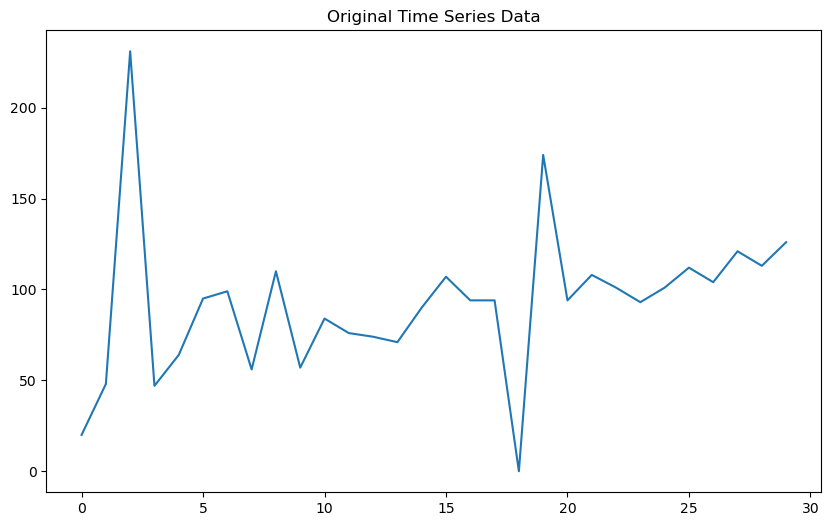

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 14.

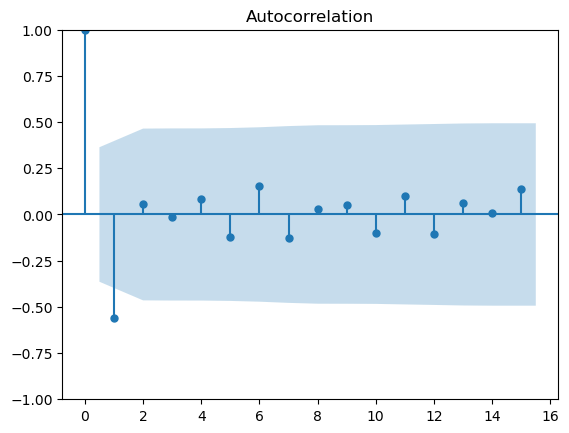

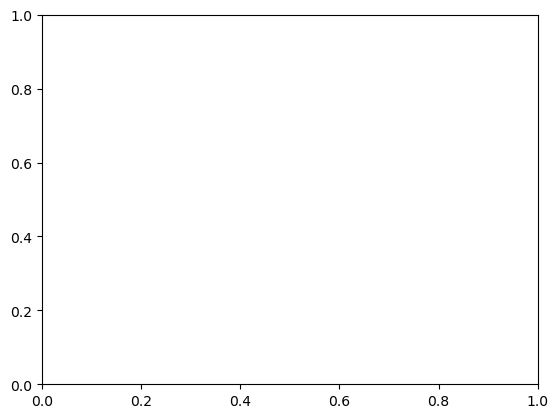

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 输入数据
data = [20, 48, 231, 47, 64, 95, 99, 56, 110, 57, 84, 76, 74, 71, 90, 107, 94, 94, 0, 174, 94, 108, 101, 93, 101, 112, 104, 121, 113, 126]

# 将数据转换为时间序列
data_series = pd.Series(data)

# 绘制数据图形，查看趋势
plt.figure(figsize=(10, 6))
plt.plot(data_series)
plt.title('Original Time Series Data')
plt.show()

# 选择ARIMA模型的参数 (p, d, q)
# 这里我们尝试自动选择参数, 或者通过ACF/PACF图来选择p和q值
# 使用差分来平稳化数据
diff_data = data_series.diff().dropna()

# ACF和PACF图帮助我们选择合适的p, d, q
plot_acf(diff_data)
plot_pacf(diff_data)
plt.show()

# ARIMA模型拟合
model = ARIMA(data_series, order=(1, 1, 1))  # 这里假设(p, d, q) = (1, 1, 1)
model_fit = model.fit()

# 预测下一个值
forecast = model_fit.forecast(steps=1)  # 预测下一个值
print(f"Predicted next value: {forecast[0]}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(data_series, label='Original Data')
plt.plot(np.arange(len(data_series), len(data_series) + 1), forecast, marker='o', label='Forecast', color='red')
plt.legend()
plt.show()
